### Exercise 5
Using sklearn, considering a 10-fold stratified cross validation (random=0), plot the cumulative 
testing confusion matrices of 𝑘NN (uniform weights, 𝑘 =5, Euclidean distance) and Naïve Bayes 
(Gaussian assumption). Use all remaining classifier parameters as default.

In [7]:
import numpy as np  
from scipy.stats import norm

y3 = 0.8
A = 2/9 # P(y1,y2)
# P(y1,y2|P) and P(P) are always the same

observations_all = [1.2,0.8,0.5,0.9,0.8,1,0.9,1.2,0.8]
miu_all = np.mean(observations_all)
sigma_squared_all = np.var(observations_all, ddof=1)
beta_all = norm.pdf(y3,miu_all,np.sqrt(sigma_squared_all)) #P(y3)

observations_p = [1.2,0.8,0.5,0.9,0.8]
miu_p = np.mean(observations_p)
sigma_squared_p = np.var(observations_p, ddof=1)
beta_p = norm.pdf(y3,miu_p,np.sqrt(sigma_squared_p)) #P(y3|P)

((1/5)*beta_all*(5/9))/(A*beta_p)

0.5249199952091865

In [8]:
import pandas as pd
from scipy.io.arff import loadarff

# Reading the ARFF file
data = loadarff('data/pd_speech.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

X = df.drop('class', axis=1)
y = df['class']

In [9]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import numpy as np

folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')
nb = GaussianNB()

# initialize confusion matrices
cm_knn = np.empty((0,0))
cm_nb = np.empty((0,0))

# initialize arrays to store the confusion matrices
cm_knn = []
cm_nb = []

# initialize lists to store the accuracy of each fold
acc_knn = []
acc_nb = []

# initialize normalization scaler
scaler = StandardScaler()

# iterate per fold
for train_k, test_k in folds.split(X, y):
    # split the data
    X_train, X_test = X.iloc[train_k], X.iloc[test_k]
    y_train, y_test = y.iloc[train_k], y.iloc[test_k]
    # normalize the data
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    # train and assess
    knn.fit(X_train, y_train)
    nb.fit(X_train, y_train)
    # add prediction to cumulative confusion matrix
    cm_knn.append(confusion_matrix(y_test, knn.predict(X_test)))
    cm_nb.append(confusion_matrix(y_test, nb.predict(X_test)))
    # add accuracy to list
    acc_knn.append(knn.score(X_test, y_test))
    acc_nb.append(nb.score(X_test, y_test))

Text(0.5, 1.0, 'Naive Bayes')

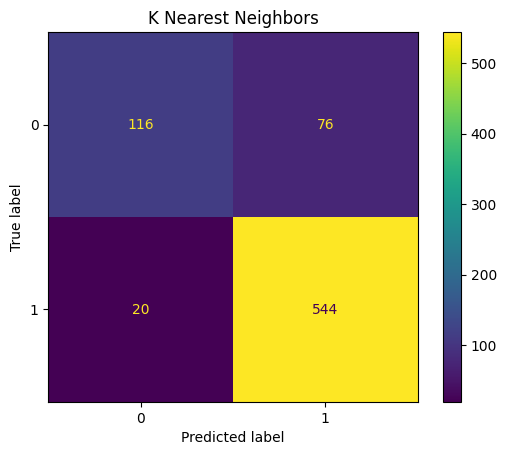

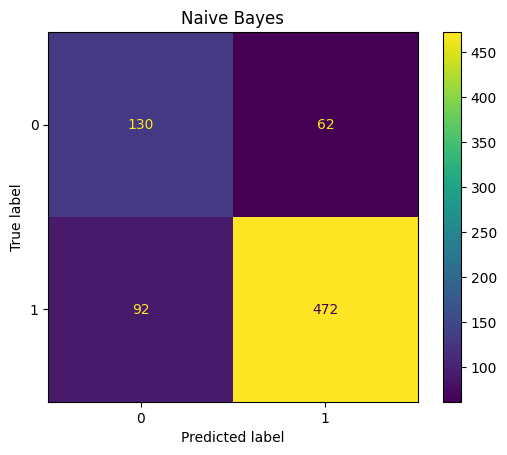

In [10]:
# plot the confusion matrices
disp_knn = ConfusionMatrixDisplay(sum(cm_knn))
disp_knn.plot()
disp_knn.ax_.set_title("K Nearest Neighbors")
disp_nb = ConfusionMatrixDisplay(sum(cm_nb))
disp_nb.plot()
disp_nb.ax_.set_title("Naive Bayes")

### Exercise 6

Using scipy, test the hypothesis “𝑘NN is statistically superior to Naïve Bayes regarding 
accuracy”, asserting whether is true. 

In [11]:
# t-test to compare the accuracy of the two classifiers
from scipy.stats import ttest_rel
t, p = ttest_rel(acc_knn, acc_nb, alternative='greater')
print("t = {:f}, p = {:f}".format(t, p))


t = 4.110858, p = 0.001317
